<a href="https://colab.research.google.com/github/nhv303/funix-data-science/blob/main/DSP303x_01_EN_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [ ]:
#TO DO:
names = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
df = pd.read_csv('pima-indians-diabetes.csv', engine = 'python', names = names)

## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [ ]:
#TO DO:
df.shape

(768, 9)

In [ ]:
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [ ]:
#TO DO:
corr = df.corr()

### 4. Render the corr matrix using the heatmap in seaborn.

Text(0.5, 1, 'Correlation heatmap')

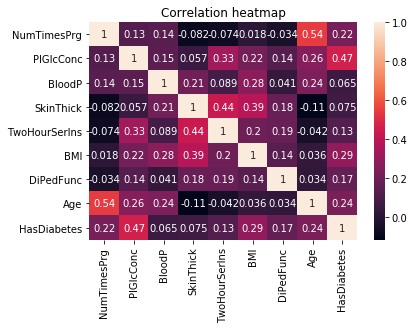

In [ ]:
#TO DO:
%matplotlib inline
sns.heatmap(corr, annot = True)
plt.title('Correlation heatmap')

### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

In [ ]:
#the column with the biggest corr number with "HasDiabetes" is PIGIcConc
df['PlGlcConc']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: PlGlcConc, Length: 768, dtype: int64

## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

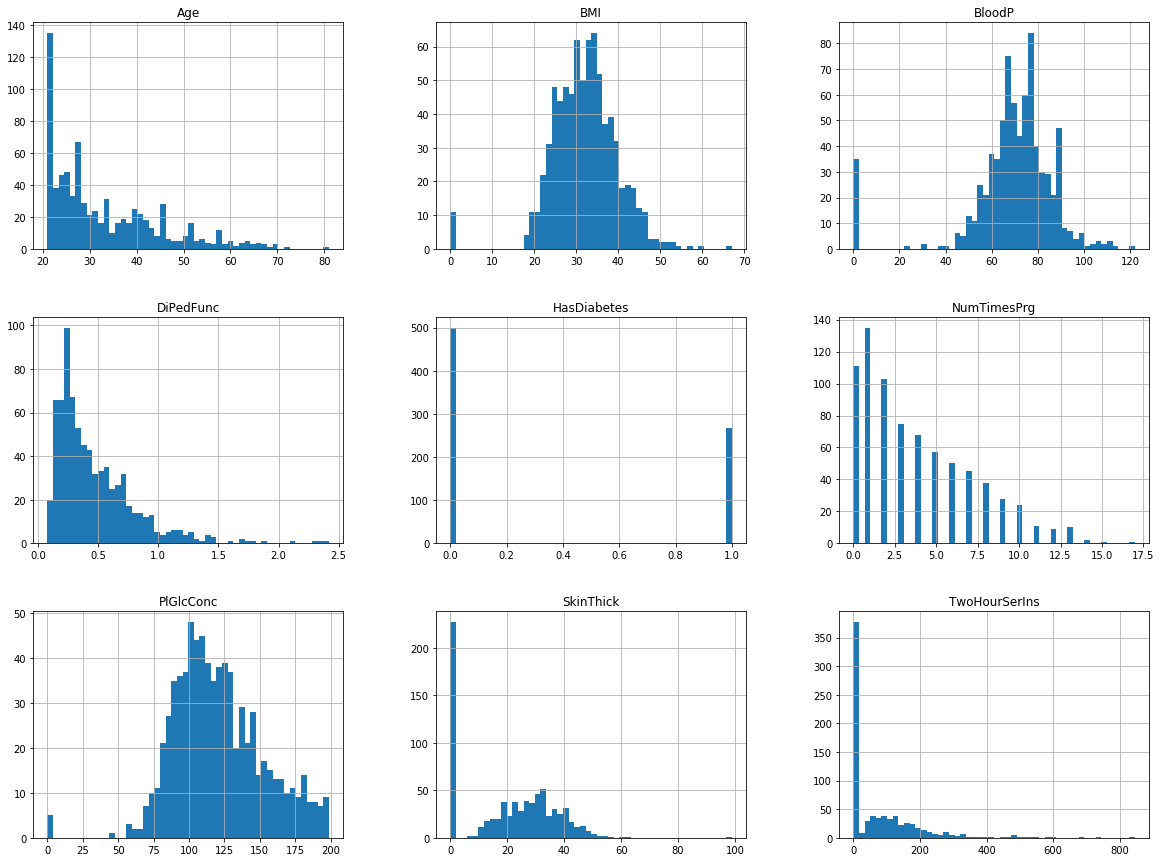

In [ ]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

In [ ]:
#TO DO:
a = ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'] 
for i in a:
  df[i]=df[i].replace(0,df[i].median())

## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

In [ ]:
#TO DO:
X = df[["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age"]] .values.astype(float) #define feature set X and convert to numpy array
y = df['HasDiabetes'] #define target y and convert to numpy array
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) #standardize X

# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [ ]:
#TO DO:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

### TO DO:
We normalize data before training step because normalization enables a fair comparison between the different features, making sure they have the same impact, and it is also important for computational reasons. Then we need to split the data into 2 separate parts: for training and for testing. We only use training set to train the model, and use testing set to test the performance of the trained model on unseen data.

### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [ ]:
#TO DO:
print('The proportion of positive diabetes/total women on the full dataset:',(y.value_counts()[1])*100.0/len(df))
print('The proportion of positive diabetes/total women on the training dataset:', (np.count_nonzero(y_train == 1))*100.0/len(y_train))
print('The proportion of positive diabetes/total women on the testing dataset:', (np.count_nonzero(y_test == 1))*100.0/len(y_test))

The proportion of positive diabetes/total women on the full dataset: 34.895833333333336
The proportion of positive diabetes/total women on the training dataset: 34.36482084690554
The proportion of positive diabetes/total women on the testing dataset: 37.01298701298701


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Import Evaluation Metrices

In [ ]:
from sklearn.metrics import jaccard_similarity_score, f1_score

In [ ]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}

# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
#set knn base case
knn_base = KNeighborsClassifier().fit(X_train,y_train)
yhat_knn_base = knn_base.predict(X_test)
print("Base case Train set Jaccard: ", metrics.accuracy_score(y_train, knn_base.predict(X_train)),", F1 score:", f1_score(y_train, knn_base.predict(X_train)))
print("Base case Test set Jaccard: ", metrics.accuracy_score(y_test, yhat_knn_base),", F1 score:", f1_score(y_test, yhat_knn_base))

Base case Train set Jaccard:  0.8045602605863192 , F1 score: 0.6923076923076924
Base case Test set Jaccard:  0.7337662337662337 , F1 score: 0.594059405940594


In [ ]:
#List 3 Hyperparameters for tuning
weights = ['uniform', 'distance']  #default=’uniform’
n_neighbors = list(range(1,20)) # default=5
p=[1,2] #default=2
#Convert to dictionary
hyperparameters = dict(weights=weights, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=10)
#Fit the model on training set
knn = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best weights:', knn.best_estimator_.get_params()['weights'])
print('Best p:', knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn.best_estimator_.get_params()['n_neighbors'])

Best weights: distance
Best p: 2
Best n_neighbors: 16


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.
Type your answer in the cell bellow as markdown format.

### TO DO:
'n_neighbors' are the number of neighbors that will vote for the class of the target point; default number is 5. From GridSearch, the optimal n_neighbors is 29.  

'weights' parameter has two choices: ‘uniform‘ and ‘distance‘. For the 'uniform' weight, each of the k neighbors has equal vote whatever its distance from the target point. If the weight is ‘distance‘ then voting weightage or importance varies by inverse of distance; those points who are nearest to the target point have greater influence than those who are farther away. From GridSearch, the optimal weights is uniform. 

'p' parameter indicates distance measure. A general formulation of distance metric is ‘minkowski’ distance. When parameter 'p' is 2, it is the same as euclidean distance and when parameter 'p' is 1, it is Manhattan distance. From GridSearch, the optimal p is 2, which is the euclidean distance.

### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  
**Requirement**: F1 score on test data must be higher than **0.6**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
#TO DO:
yhat = knn.predict(X_test)
print("Train set Jaccard: ", metrics.accuracy_score(y_train, knn.predict(X_train)),", F1 score:", f1_score(y_train, knn.predict(X_train)))
print("Test set Jaccard: ", metrics.accuracy_score(y_test, yhat),", F1 score:", f1_score(y_test, yhat))

Train set Jaccard:  1.0 , F1 score: 1.0
Test set Jaccard:  0.7857142857142857 , F1 score: 0.6597938144329897


In [ ]:
#the tuned model is better than base case => keep the tuned model
#save the tuned model to f1_scores dict and jaccarrd_scores dict
f1_scores['train']['KNN'] = f1_score(y_train, knn.predict(X_train))
jaccard_scores['train']['KNN'] = metrics.accuracy_score(y_train, knn.predict(X_train))
f1_scores['test']['KNN'] = f1_score(y_test, yhat)
jaccard_scores['test']['KNN'] = metrics.accuracy_score(y_test, yhat)

# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.6**, the Jaccard similarity score must be higher than **0.73**.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#set DecisionTree base case
tree_base = DecisionTreeClassifier().fit(X_train,y_train)
yhat_tree_base = tree_base.predict(X_test)
print("Base case Train set Jaccard: ", metrics.accuracy_score(y_train, tree_base.predict(X_train)),", F1 score:", f1_score(y_train, tree_base.predict(X_train)))
print("Base case Test set Jaccard: ", metrics.accuracy_score(y_test, yhat_tree_base),", F1 score:", f1_score(y_test, yhat_tree_base))

Base case Train set Jaccard:  1.0 , F1 score: 1.0
Base case Test set Jaccard:  0.7792207792207793 , F1 score: 0.706896551724138


In [ ]:
#the base case already met requirements. 
#List 3 Hyperparameters for tuning
criterion = ['gini', 'entropy'] #defaul base case is gini
max_depth = list(range(3,10)) #default=None
max_features = [1,2,3,4,5,6,7] #default=None
#Convert to dictionary
hyperparameters = dict(criterion = criterion, max_depth = max_depth, max_features = max_features)
#Create new DecisionTree object
tree = DecisionTreeClassifier()
#Use GridSearch
clf = GridSearchCV(tree, hyperparameters, cv=10)
#Fit the model on training set
tree = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best criterion:', tree.best_estimator_.get_params()['criterion'])
print('Best max_depth:', tree.best_estimator_.get_params()['max_depth'])
print('Best max_features:', tree.best_estimator_.get_params()['max_features'])

Best criterion: gini
Best max_depth: 5
Best max_features: 6


In [ ]:
yhat_tree = tree.predict(X_test)
print("Train set Jaccard: ", metrics.accuracy_score(y_train, tree.predict(X_train)),", F1 score:", f1_score(y_train, tree.predict(X_train)))
print("Test set Jaccard: ", metrics.accuracy_score(y_test, yhat_tree),", F1 score:", f1_score(y_test, yhat_tree))

Train set Jaccard:  0.8420195439739414 , F1 score: 0.7728337236533958
Test set Jaccard:  0.7597402597402597 , F1 score: 0.6666666666666666


In [ ]:
#the tuned model performs worse than base case => keep the base case
tree = tree_base
#save to f1_scores dict and jaccarrd_scores dict
f1_scores['train']['DT'] = f1_score(y_train, tree.predict(X_train))
jaccard_scores['train']['DT'] = metrics.accuracy_score(y_train, tree.predict(X_train))
f1_scores['test']['DT'] = f1_score(y_test, yhat_tree)
jaccard_scores['test']['DT'] = metrics.accuracy_score(y_test, yhat_tree)

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:
criterion' indicates the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. From GridSearch, the optimal criterion is entropy.

'max_depth' indicates the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. From GridSearch, the optimal max_depth is 5.

'max_features' indicates the number of features to consider when looking for the best split. From GridSearch, the optimal max_features is 3.

# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.62**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
from sklearn.svm import SVC

In [ ]:
#set SVM base case
svm_base = SVC(probability=True).fit(X_train,y_train)
yhat_svm_base = svm_base.predict(X_test)
print("Base case Train set Jaccard: ", metrics.accuracy_score(y_train, svm_base.predict(X_train)),", F1 score:", f1_score(y_train, svm_base.predict(X_train)))
print("Base case Test set Jaccard: ", metrics.accuracy_score(y_test, yhat_svm_base),", F1 score:", f1_score(y_test, yhat_svm_base))

Base case Train set Jaccard:  0.8159609120521173 , F1 score: 0.6970509383378017
Base case Test set Jaccard:  0.8376623376623377 , F1 score: 0.7524752475247524


In [ ]:
#the base case already met requirements. 
#List 3 Hyperparameters for tuning
kernel = ['poly', 'rbf', 'sigmoid'] # default=’rbf’
gamma = ['scale', 'auto'] #default=’scale’
Cs = [0.001, 0.01, 0.1, 1, 10] #default=1.0
#Convert to dictionary 
hyperparameters = dict(C = Cs, kernel = kernel, gamma = gamma)
#Create new SVM object
svm = SVC(probability=True)
#Use GridSearch
clf = GridSearchCV(svm, hyperparameters, cv=10)
#Fit the model on training set
svm = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best C:', svm.best_estimator_.get_params()['C'])
print('Best kernel:', svm.best_estimator_.get_params()['kernel'])
print('Best gamma:', svm.best_estimator_.get_params()['gamma'])

Best C: 0.1
Best kernel: sigmoid
Best gamma: scale


In [ ]:
yhat_svm = svm.predict(X_test)
print("Train set Jaccard: ", metrics.accuracy_score(y_train, svm.predict(X_train)),", F1 score:", f1_score(y_train, svm.predict(X_train)))
print("Test set Jaccard: ", metrics.accuracy_score(y_test, yhat_svm),", F1 score:", f1_score(y_test, yhat_svm))

Train set Jaccard:  0.7703583061889251 , F1 score: 0.6259946949602122
Test set Jaccard:  0.7792207792207793 , F1 score: 0.66


In [ ]:
#the tuned model performs worse than base case => keep the base model
svm = svm_base
#save to f1_scores dict and jaccarrd_scores dict
f1_scores['train']['SVM'] = f1_score(y_train, svm.predict(X_train))
jaccard_scores['train']['SVM'] = metrics.accuracy_score(y_train, svm.predict(X_train))
f1_scores['test']['SVM'] = f1_score(y_test, yhat_svm)
jaccard_scores['test']['SVM'] = metrics.accuracy_score(y_test, yhat_svm)

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:
'kernel' indicates the kernel type to be used in the algorithm. It must be 'linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’. I only choose ‘poly’, ‘rbf’, ‘sigmoid’.From GridSearch, the optimal kernel is sigmoid.

'gamma' indicates Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. From GridSearch, the optimal gamma is scale .

'C'is Regularization parameter. The strength of the regularization is inversely proportional to C. From GridSearch, the optimal C is 0.1.

# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.63**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#set LR base case
LR_base = LogisticRegression().fit(X_train,y_train)
yhat_LR_base = LR_base.predict(X_test)
print("Base case Train set Jaccard: ", metrics.accuracy_score(y_train, LR_base.predict(X_train)),", F1 score:", f1_score(y_train, LR_base.predict(X_train)))
print("Base case Test set Jaccard: ", metrics.accuracy_score(y_test, yhat_LR_base),", F1 score:", f1_score(y_test, yhat_LR_base))

Base case Train set Jaccard:  0.7785016286644951 , F1 score: 0.6363636363636364
Base case Test set Jaccard:  0.7727272727272727 , F1 score: 0.6464646464646465


In [ ]:
#the base case already met requirements
#List 3 Hyperparameters for tuning
penalty = ['l2', 'none'] #default=’l2’
max_iter = list(range(50, 200)) #default=100
solver = ['saga', 'newton-cg', 'lbfgs', 'sag'] #default=’lbfgs’ 
#Convert to dictionary
hyperparameters = dict(max_iter = max_iter, penalty = penalty, solver =  solver)
#Create new LogisticRegression object
LR = LogisticRegression()
#Use GridSearch
clf = GridSearchCV(LR, hyperparameters, cv=10)
#Fit the model on training set
LR = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best max_iter:', LR.best_estimator_.get_params()['max_iter'])
print('Best penalty:', LR.best_estimator_.get_params()['penalty'])
print('Best solver:', LR.best_estimator_.get_params()['solver'])

Best max_iter: 50
Best penalty: l2
Best solver: saga


In [ ]:
yhat_LR = LR.predict(X_test)
print("Train set Jaccard: ", metrics.accuracy_score(y_train, LR.predict(X_train)),", F1 score:", f1_score(y_train, LR.predict(X_train)))
print("Test set Jaccard: ", metrics.accuracy_score(y_test, yhat_LR),", F1 score:", f1_score(y_test, yhat_LR))

Train set Jaccard:  0.7785016286644951 , F1 score: 0.6363636363636364
Test set Jaccard:  0.7727272727272727 , F1 score: 0.6464646464646465


In [ ]:
#the tuned model performs equal to base case 
#save to f1_scores dict and jaccarrd_scores dict
f1_scores['train']['LR'] = f1_score(y_train, LR.predict(X_train))
jaccard_scores['train']['LR'] = metrics.accuracy_score(y_train,LR.predict(X_train))
f1_scores['test']['LR'] = f1_score(y_test, yhat_LR)
jaccard_scores['test']['LR'] = metrics.accuracy_score(y_test, yhat_LR)

# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in Logistics Regression algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:
'penalty' used to specify the norm used in the penalization. It must be ‘l1’, ‘l2’, ‘elasticnet’, ‘none’. I only choose 'l2' and 'none' since the ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied. From GridSearch, the optimal penalty is l2.

'max_iter' indicates Maximum number of iterations taken for the solvers to converge. From GridSearch, the optimal max_iter is 50.

'solver' is Algorithm to use in the optimization problem. I choose 'newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’. From GridSearch, the optimal solver is saga.

# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
#TO DO:
#create a dictionary of our models
models = [('KNN',knn), ('DT',tree), ('SVM',svm), ('LR',LR)]
#create our voting classifier, inputting our models
eclf1 = VotingClassifier(estimators= models, voting = 'soft')

### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.¶

**Requirement**: F1 score on test data must be higher than **0.66**, Jaccard similarity score must be higher than **0.78**.

In [ ]:
#TO DO:
eclf1 = eclf1.fit(X_train, y_train)
yhat_eclf1 = eclf1.predict(X_test)
print("Train set Jaccard: ", metrics.accuracy_score(y_train, eclf1.predict(X_train)),", F1 score:", f1_score(y_train, eclf1.predict(X_train)))
print("Test set Jaccard: ", metrics.accuracy_score(y_test, yhat_eclf1),", F1 score:", f1_score(y_test, yhat_eclf1))

Train set Jaccard:  1.0 , F1 score: 1.0
Test set Jaccard:  0.8116883116883117 , F1 score: 0.7339449541284404


In [ ]:
#save to f1_scores dict and jaccarrd_scores dict
f1_scores['train']['EN_SOFT'] = f1_score(y_train, eclf1.predict(X_train))
jaccard_scores['train']['EN_SOFT'] = metrics.accuracy_score(y_train,eclf1.predict(X_train))
f1_scores['test']['EN_SOFT'] = f1_score(y_test, yhat_eclf1)
jaccard_scores['test']['EN_SOFT'] = metrics.accuracy_score(y_test, yhat_eclf1)

### 21, 22. Perform task 19 and 20 using hard voting.
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data must be higher than **0.57**, Jaccard similarity score must be higher than **0.73**.

In [ ]:
#TO DO:
#create our voting classifier, inputting our models
eclf2 = VotingClassifier(estimators= models, voting = 'hard')

In [ ]:
#TO DO:
eclf2 = eclf2.fit(X_train, y_train)
yhat_eclf2 = eclf2.predict(X_test)
print("Train set Jaccard: ", metrics.accuracy_score(y_train, eclf2.predict(X_train)),", F1 score:", f1_score(y_train, eclf2.predict(X_train)))
print("Test set Jaccard: ", metrics.accuracy_score(y_test, yhat_eclf2),", F1 score:", f1_score(y_test, yhat_eclf2))

Train set Jaccard:  0.8762214983713354 , F1 score: 0.7803468208092486
Test set Jaccard:  0.8051948051948052 , F1 score: 0.6808510638297872


In [ ]:
#save to f1_scores dict and jaccarrd_scores dict
f1_scores['train']['EN_HARD'] = f1_score(y_train, eclf2.predict(X_train))
jaccard_scores['train']['EN_HARD'] = metrics.accuracy_score(y_train,eclf2.predict(X_train))
f1_scores['test']['EN_HARD'] = f1_score(y_test, yhat_eclf2)
jaccard_scores['test']['EN_HARD'] = metrics.accuracy_score(y_test, yhat_eclf2)

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 23. Create a data frame that describes the result as exactly as above.

In [ ]:
#TO DO:
result = pd.DataFrame.from_dict([jaccard_scores['train'],f1_scores['train'], jaccard_scores['test'], f1_scores['test']], orient = 'columns', )
result = result.transpose().reset_index()
result.columns = ['Algorithm','Jaccard-training', 'F1-score-training', 'Jaccard-testing','F1-score-testing']
result

,Algorithm,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
0,KNN,1.000000,1.000000,0.785714,0.659794
1,DT,1.000000,1.000000,0.759740,0.666667
2,SVM,0.815961,0.697051,0.779221,0.660000
3,LR,0.778502,0.636364,0.772727,0.646465
4,EN_HARD,0.876221,0.780347,0.805195,0.680851
5,EN_SOFT,1.000000,1.000000,0.811688,0.733945


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?
Type your answer in the cell bellow as the markdown format.
	

### TO DO:
Ensemble methods are not always better than a single model. This is because esemble model works well only when we ensemble models with low correlation and does not have the same bias.